In [1]:
import pandas as pd
import os

In [2]:
df = pd.read_csv('diseases.csv')
df.shape

(41, 133)

In [3]:
df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Peptic ulcer diseae
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Diabetes
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma


In [4]:
# Sort the DataFrame by the 'prognosis' column in alphabetical order
df.sort_values(by='prognosis', inplace=True)

# Reset the index
df.reset_index(drop=True, inplace=True)


In [5]:
# Separate the 'prognosis' column from the rest of the columns
prognosis_column = df['prognosis']
other_columns = df.drop(columns=['prognosis'])

# Sort the other columns in alphabetical order
other_columns = other_columns.reindex(sorted(other_columns.columns), axis=1)

# Concatenate the sorted columns and 'prognosis' column
df_sorted = pd.concat([other_columns, prognosis_column], axis=1)

# Print the DataFrame with columns sorted and 'prognosis' column at the end


In [6]:
df = df_sorted

In [7]:
df # now the features and unique values of prognosis are in alphalbetical order

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,(vertigo) Paroymsal Positional Vertigo
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,AIDS
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Acne
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Alcoholic hepatitis
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Allergy
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Arthritis
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
7,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,Cervical spondylosis
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Chronic cholestasis


In [8]:
# Get the unique values in the "prognosis" column
unique_prognosis_values = df['prognosis'].unique()

# Initialize a dictionary to store counts
counts = {}

# Loop through unique values and count 1s for each
for value in unique_prognosis_values:
    # Filter the DataFrame for rows with the current value in "prognosis"
    filtered_df = df[df['prognosis'] == value]
    # Count the number of 1s in that row (excluding the "prognosis" column)
    count_ones = filtered_df.iloc[:, :-1].eq(1).sum().sum()
    counts[value] = count_ones

# Sort the counts from greatest to least
sorted_counts = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))

# Print the sorted counts of all the 1s of disease from greatest to least
for value, count in sorted_counts.items():
    print(f"Count of 1s for '{value}': {count}")

Count of 1s for 'Common Cold': 17
Count of 1s for 'Tuberculosis': 16
Count of 1s for 'Dengue': 14
Count of 1s for 'Hepatitis E': 13
Count of 1s for 'Hypothyroidism': 13
Count of 1s for 'Hepatitis B': 12
Count of 1s for 'Hypoglycemia': 12
Count of 1s for 'Chicken pox': 11
Count of 1s for 'Hyperthyroidism': 11
Count of 1s for 'Pneumonia': 11
Count of 1s for 'Typhoid': 11
Count of 1s for 'hepatitis A': 11
Count of 1s for 'Diabetes ': 10
Count of 1s for 'Hepatitis D': 9
Count of 1s for 'Migraine': 9
Count of 1s for 'Jaundice': 8
Count of 1s for 'Malaria': 8
Count of 1s for 'Alcoholic hepatitis': 7
Count of 1s for 'Chronic cholestasis': 7
Count of 1s for 'Varicose veins': 7
Count of 1s for '(vertigo) Paroymsal  Positional Vertigo': 6
Count of 1s for 'Bronchial Asthma': 6
Count of 1s for 'GERD': 6
Count of 1s for 'Hepatitis C': 6
Count of 1s for 'Osteoarthristis': 6
Count of 1s for 'Peptic ulcer diseae': 6
Count of 1s for 'Psoriasis': 6
Count of 1s for 'Arthritis': 5
Count of 1s for 'Cervica

In [9]:
# Count the number of 1 values in all columns (except "prognosis") of the DataFrame
ones_count = df.iloc[:, :-1].eq(1).sum()

# Sort the counts in descending order
ones_count_sorted = ones_count.sort_values(ascending=False)

# Display the sorted counts
ones_count_sorted.head(44)



fatigue                         17
vomiting                        17
high_fever                      12
nausea                          10
loss_of_appetite                10
headache                        10
abdominal_pain                   9
yellowish_skin                   8
yellowing_of_eyes                7
skin_rash                        7
chills                           7
sweating                         6
malaise                          6
chest_pain                       6
joint_pain                       6
itching                          6
diarrhoea                        5
dark_urine                       5
cough                            5
weight_loss                      4
breathlessness                   4
irritability                     4
excessive_hunger                 4
lethargy                         4
muscle_pain                      4
dizziness                        3
loss_of_balance                  3
mild_fever                       3
blurred_and_distorte

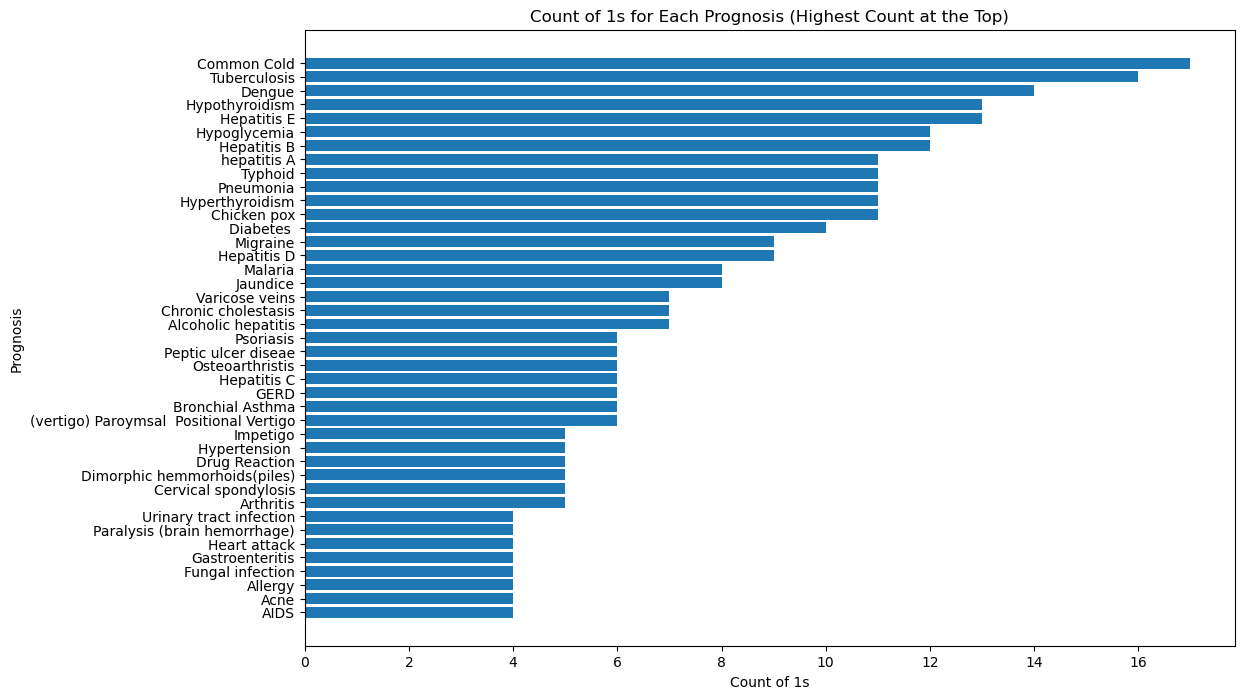

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already loaded your DataFrame, df

# Get the unique values in the 'prognosis' column
unique_prognosis_values = df['prognosis'].unique()

# Initialize a dictionary to store the count of 1s for each prognosis
count_dict = {}

# Count the 1s for each unique value in the 'prognosis' column
for value in unique_prognosis_values:
    filtered_df = df[df['prognosis'] == value]
    ones_count = filtered_df.iloc[:, :-1].sum().sum()
    count_dict[value] = ones_count

# Sort the count_dict by values in descending order
sorted_count_dict = {k: v for k, v in sorted(count_dict.items(), key=lambda item: item[1], reverse=False)}

# Create a horizontal bar graph
plt.figure(figsize=(12, 8))
plt.barh(list(sorted_count_dict.keys()), list(sorted_count_dict.values()))
plt.xlabel('Count of 1s')
plt.ylabel('Prognosis')
plt.title('Count of 1s for Each Prognosis (Highest Count at the Top)')
plt.show()


In [11]:
import pandas as pd

# Get the unique values in the "prognosis" column
unique_prognosis_values = df['prognosis'].unique()

# Create a dictionary to store the DataFrames for each unique value
result_dict = {}

# Iterate through unique values and filter the DataFrame for each
for value in unique_prognosis_values:
    # Filter the DataFrame to include only rows where "prognosis" matches the current value
    filtered_rows = df[df['prognosis'] == value]
    
    # Remove the "prognosis" column
    filtered_rows = filtered_rows.drop(columns=['prognosis'])
    
    # Filter the columns to include only features with 1s
    filtered_rows = filtered_rows.loc[:, (filtered_rows == 1).any()]
    
    # Store the resulting DataFrame in the dictionary with the value as the key
    result_dict[value] = filtered_rows

# Print the resulting DataFrames for each unique value in Python format
for value, result_df in result_dict.items():
    print(f"Prognosis: {value}")
    print(result_df.to_string(index=False))
    print("\n")


Prognosis: (vertigo) Paroymsal  Positional Vertigo
 headache  loss_of_balance  nausea  spinning_movements  unsteadiness  vomiting
        1                1       1                   1             1         1


Prognosis: AIDS
 extra_marital_contacts  high_fever  muscle_wasting  patches_in_throat
                      1           1               1                  1


Prognosis: Acne
 blackheads  pus_filled_pimples  scurring  skin_rash
          1                   1         1          1


Prognosis: Alcoholic hepatitis
 abdominal_pain  distention_of_abdomen  fluid_overload.1  history_of_alcohol_consumption  swelling_of_stomach  vomiting  yellowish_skin
              1                      1                 1                               1                    1         1               1


Prognosis: Allergy
 chills  continuous_sneezing  shivering  watering_from_eyes
      1                    1          1                   1


Prognosis: Arthritis
 movement_stiffness  muscle_weakness  

In [12]:
unique_prognosis_values = df['prognosis'].unique()
print(unique_prognosis_values)


['(vertigo) Paroymsal  Positional Vertigo' 'AIDS' 'Acne'
 'Alcoholic hepatitis' 'Allergy' 'Arthritis' 'Bronchial Asthma'
 'Cervical spondylosis' 'Chicken pox' 'Chronic cholestasis' 'Common Cold'
 'Dengue' 'Diabetes ' 'Dimorphic hemmorhoids(piles)' 'Drug Reaction'
 'Fungal infection' 'GERD' 'Gastroenteritis' 'Heart attack' 'Hepatitis B'
 'Hepatitis C' 'Hepatitis D' 'Hepatitis E' 'Hypertension '
 'Hyperthyroidism' 'Hypoglycemia' 'Hypothyroidism' 'Impetigo' 'Jaundice'
 'Malaria' 'Migraine' 'Osteoarthristis' 'Paralysis (brain hemorrhage)'
 'Peptic ulcer diseae' 'Pneumonia' 'Psoriasis' 'Tuberculosis' 'Typhoid'
 'Urinary tract infection' 'Varicose veins' 'hepatitis A']


In [17]:
I am testing the correlation between 


from scipy.stats import pointbiserialr

# Define your features and the binary variable for Gastroenteritis
dehydration = df['dehydration']
diarrhoea = df['diarrhoea']  # Change "diarrhea" to "diarrhoea"
sunken_eyes = df['sunken_eyes']
vomiting = df['vomiting']
gastroenteritis = (df['prognosis'] == 'Gastroenteritis').astype(int)


# Perform point-biserial correlation for each feature with Gastroenteritis
corr_dehydration, _ = pointbiserialr(gastroenteritis, dehydration)
corr_diarrhoea, _ = pointbiserialr(gastroenteritis, diarrhoea)  # Change "diarrhea" to "diarrhoea"
corr_sunken_eyes, _ = pointbiserialr(gastroenteritis, sunken_eyes)
corr_vomiting, _ = pointbiserialr(gastroenteritis, vomiting)

# Print the correlation coefficients
print(f'Point-Biserial Correlation for Dehydration: {corr_dehydration:.2f}')
print(f'Point-Biserial Correlation for Diarrhoea: {corr_diarrhoea:.2f}')
print(f'Point-Biserial Correlation for Sunken Eyes: {corr_sunken_eyes:.2f}')
print(f'Point-Biserial Correlation for Vomiting: {corr_vomiting:.2f}')


Point-Biserial Correlation for Dehydration: 1.00
Point-Biserial Correlation for Diarrhoea: 0.42
Point-Biserial Correlation for Sunken Eyes: 1.00
Point-Biserial Correlation for Vomiting: 0.19


This data tells me if subject has dehydration, then they will have gastroenteritis. if subject have diahhroea, they will have 42% of having gastroenteritis

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create a label encoder
label_encoder = LabelEncoder()

# Fit the label encoder on all unique values in the "prognosis" column
label_encoder.fit(df['prognosis'])

# Transform the "prognosis" column to encoded values and create a new column
df['prognosis_encoded'] = label_encoder.transform(df['prognosis'])

# Split the data into train, validation, and test sets
X = df.drop(columns=['prognosis_encoded'])
y = df['prognosis_encoded']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_validation, X_test, y_validation, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


In [14]:
X_train

,abdominal_pain,abnormal_menstruation,acidity,acute_liver_failure,altered_sensorium,anxiety,back_pain,belly_pain,blackheads,bladder_discomfort,...,watering_from_eyes,weakness_in_limbs,weakness_of_one_body_side,weight_gain,weight_loss,yellow_crust_ooze,yellow_urine,yellowing_of_eyes,yellowish_skin,prognosis
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bronchial Asthma
26,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Hypothyroidism
12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Diabetes
17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Gastroenteritis
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,Chronic cholestasis
15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
32,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Paralysis (brain hemorrhage)
16,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GERD
35,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Psoriasis
34,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Pneumonia
